# Online Shopper's Intention 
**IMT 575 - Data Science III | Autumn 2019**

Christopher Lee, Harry Xie, Jian-Sin Lee, Samuel Hung

#### Data Preparation

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('./data/online_shoppers_intention.csv')
data.shape

(12330, 18)

In [3]:
# inputing Missing Values with 0
data.fillna(0, inplace = True)

# checking the no. of null values in data after inputing the missing values
data.isnull().sum().sum()

0

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

LabEnc = LabelEncoder()
data1 = data.copy()
data1['Revenue'] = LabEnc.fit_transform(data1['Revenue'])
data1['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [6]:
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [7]:
# one hot encoding

data1 = pd.get_dummies(data1)
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# getting dependent and independent variables
x = data1

# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


#### EDA

In [9]:
# For the graphs here, I just plotted them by fair means or foul,
# so they were not necessarily generated from the data source directly haha.
# (But anyway they were plotted with correct values.)

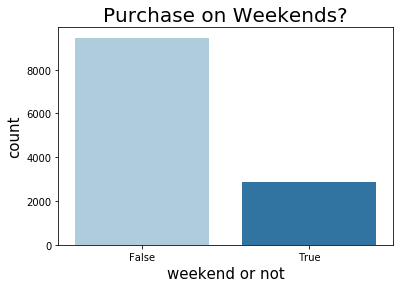

In [10]:
sns.countplot(data['Weekend'], palette = 'Paired')
plt.rcParams['figure.figsize'] = (7, 6)
plt.title('Purchase on Weekends?', fontsize = 20)
plt.xlabel('weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

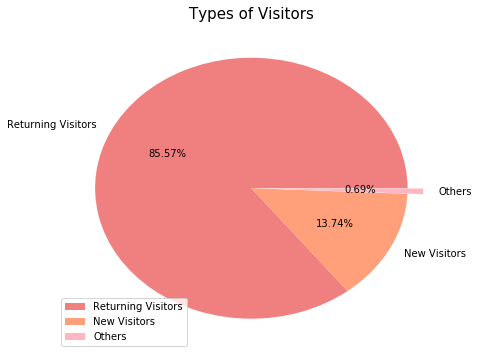

In [11]:
size = [10551, 1694, 85]
colors = ['lightcoral', 'lightsalmon', 'lightpink']
labels = "Returning Visitors", "New Visitors", "Others"
explode = [0, 0, 0.1]

plt.pie(size, colors = colors, labels = labels, explode = explode, 
        shadow = False, autopct = '%.2f%%')
plt.title('Types of Visitors', fontsize = 15)
plt.axis('off')
plt.legend(loc = 3)
plt.show()

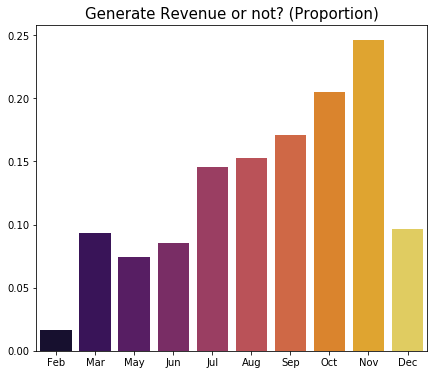

In [12]:
mon = ['Feb', 'Mar', 'May', 'Jun', 'Jul', 
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ratio = [0.0164, 0.0931, 0.0745, 0.0856, 0.1455,
         0.1524, 0.1706, 0.2047, 0.2460, 0.0962]

sns.barplot(x = mon, y = ratio, palette = 'inferno')

plt.rcParams['figure.figsize'] = (5, 4)
plt.title('''Generate Revenue or not? (Proportion)''', fontsize = 15)
plt.show()

In [13]:
LabEnc = LabelEncoder()
data2 = data.copy()
data2['Month'] = LabEnc.fit_transform(data2['Month'])
data2['VisitorType'] = LabEnc.fit_transform(data2['VisitorType'])
data2['Weekend'] = LabEnc.fit_transform(data2['Weekend'])
data2['Revenue'] = LabEnc.fit_transform(data2['Revenue'])

data2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


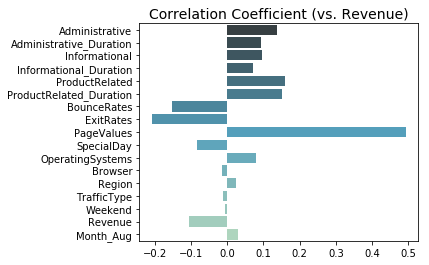

In [14]:
label = []
corr = []

for i in range(len(data2.columns) - 1):
    label.append(data1.columns[i])
    corr.append(np.corrcoef(data2[data2.columns[i]], data2.Revenue)[0][1])

sns.barplot(x = corr, y = label, palette = 'GnBu_d')

plt.rcParams['figure.figsize'] = [7, 4]
plt.title('''Correlation Coefficient (vs. Revenue)''', fontsize = 14)
plt.yticks(size = 10)
plt.show()

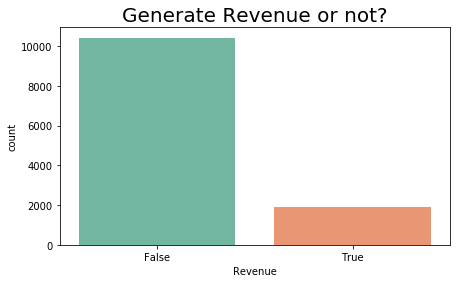

In [15]:
sns.countplot(data['Revenue'], palette = 'Set2')

plt.rcParams['figure.figsize'] = (6, 6)
plt.title('Generate Revenue or not?', fontsize = 20)
plt.show()

#### K-means

In [16]:
# Product Related Duration & Bounce Rates
kmc = data.iloc[:, [5, 6]].values

# checking the shape of the dataset
kmc.shape

(12330, 2)

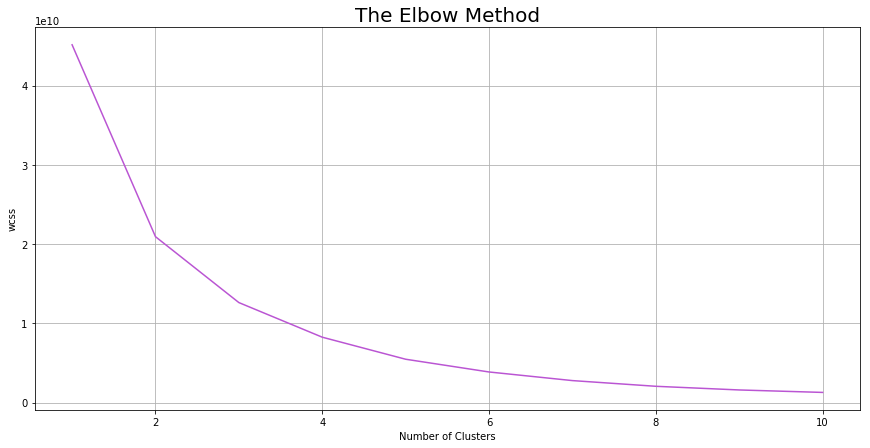

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                n_init = 10, random_state = 9, algorithm = 'elkan', tol = 0.001)
    km.fit(kmc)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(range(1, 11), wcss, color = 'mediumorchid')
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

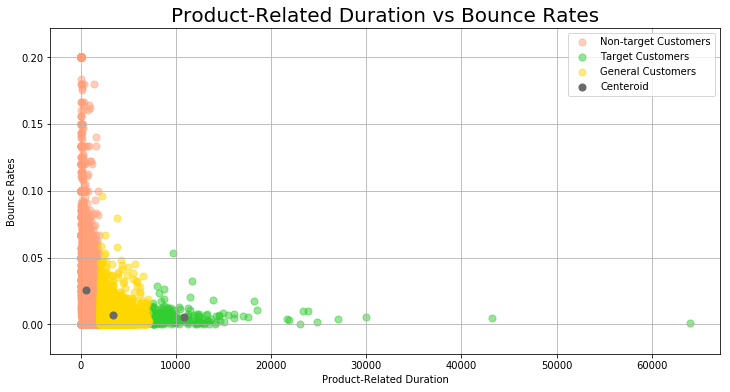

In [18]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, 
            n_init = 10, random_state = 9)
y_means = km.fit_predict(kmc)

plt.scatter(kmc[y_means == 0, 0], kmc[y_means == 0, 1], s = 50, c = 'lightsalmon', 
            alpha = 0.5, label = 'Non-target Customers')
plt.scatter(kmc[y_means == 1, 0], kmc[y_means == 1, 1], s = 50, c = 'limegreen', 
            alpha = 0.5, label = 'Target Customers')
plt.scatter(kmc[y_means == 2, 0], kmc[y_means == 2, 1], s = 50, c = 'gold', 
            alpha = 0.5, label = 'General Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, 
            c = 'dimgrey' , label = 'Centeroid')

plt.title('Product-Related Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Product-Related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

#### When dealing with imbalanced data...

In [21]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate input features (X) and target variable (y)
y6 = data1.Revenue
x6 = data1.drop('Revenue', axis = 1)
 
# Train model
lr6 = LogisticRegression().fit(x6, y6)
 
# Predict on training set
ylr6_pred = lr6.predict(x6)

# How's the accuracy?
print(accuracy_score(ylr6_pred, y6).round(4))

/Users/hy/opt/anaconda3/envs/food/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.8846


In [22]:
# Oversampling the Minority Class
from sklearn.utils import resample

# Separate majority and minority classes
major1 = data1[data1.Revenue == 0]
minor1 = data1[data1.Revenue == 1]
 
# Upsample minority class
minor1_up = resample(minor1, 
                     replace = True,       # sample with replacement
                     n_samples = 10422,    # to match majority class
                     random_state = 9)     # reproducible results
 
# Combine majority class with upsampled minority class
data_up = pd.concat([major1, minor1_up])
 
# Display new class counts
data_up.Revenue.value_counts()

1    10422
0    10422
Name: Revenue, dtype: int64

In [23]:
# Oversampling - Logistic Regression
# Separate input features (X) and target variable (y)
y62 = data_up.Revenue
x62 = data_up.drop('Revenue', axis = 1)
 
# Train model
lr62 = LogisticRegression().fit(x62, y62)
 
# Predict on training set
ylr62_pred = lr62.predict(x62)
 
# How's our accuracy?
print(accuracy_score(y62, ylr62_pred).round(4))

/Users/hy/opt/anaconda3/envs/food/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.8157


In [46]:
# Oversampling - Random Forest
# Separate input features (X) and target variable (y)
y65 = data_up.Revenue
x65 = data_up.drop('Revenue', axis = 1)
 
# Train model
rf65 = RandomForestClassifier().fit(x65, y65)
 
# Predict on training set
yrf65_pred = rf65.predict(x65)
 
# How's our accuracy?
print(accuracy_score(y65, yrf65_pred).round(4))

/Users/hy/opt/anaconda3/envs/food/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



0.9994


In [24]:
# Undersampling the Majority Class

# Separate majority and minority classes
major2 = data1[data1.Revenue == 0]
minor2 = data1[data1.Revenue == 1]
 
# Downsample majority class
major_down = resample(major2, 
                      replace = False,      # sample without replacement
                      n_samples = 1908,     # to match minority class
                      random_state = 9)     # reproducible results
 
# Combine minority class with downsampled majority class
data_down = pd.concat([major_down, minor2])
 
# Display new class counts
data_down.Revenue.value_counts()

1    1908
0    1908
Name: Revenue, dtype: int64

In [25]:
# Undersampling - Logistic Regression 
# Separate input features (X) and target variable (y)
y63 = data_down.Revenue
x63 = data_down.drop('Revenue', axis = 1)
 
# Train model
lr63 = LogisticRegression().fit(x63, y63)
 
# Predict on training set
ylr63_pred = lr63.predict(x63)
 
# How's our accuracy?
print(accuracy_score(y63, ylr63_pred).round(4))

0.8218


/Users/hy/opt/anaconda3/envs/food/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [45]:
# Undersampling - Random Forest
# Separate input features (X) and target variable (y)
y64 = data_down.Revenue
x64 = data_down.drop('Revenue', axis = 1)
 
# Train model
rf64 = RandomForestClassifier().fit(x64, y64)
 
# Predict on training set
yrf64_pred = rf64.predict(x64)
 
# How's our accuracy?
print(accuracy_score(y64, yrf64_pred).round(4))

0.9893


/Users/hy/opt/anaconda3/envs/food/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



#### Classification: Logistic Regression vs. Random Forest

In [65]:
# I re-ran the codes so some of the numbers might be slightly different from the slides.

In [27]:
# LOGISTIC REGRESSION: Splitting the data

from sklearn.model_selection import train_test_split
xlr_train, xlr_test, ylr_train, ylr_test = train_test_split(x, y, test_size = 0.33, random_state = 9)

# checking the shapes
print("Shape of xlr_train :", xlr_train.shape)
print("Shape of ylr_train :", ylr_train.shape)
print("Shape of xlr_test :", xlr_test.shape)
print("Shape of ylr_test :", ylr_test.shape)

Shape of xlr_train : (8261, 28)
Shape of ylr_train : (8261,)
Shape of xlr_test : (4069, 28)
Shape of ylr_test : (4069,)


**Dummy Classifier**

In [29]:
from sklearn.dummy import DummyClassifier

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(xlr_train, ylr_train)
dummy_pred = dummy.predict(xlr_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(ylr_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.8491029737036127


In [37]:
# Train the logistic regression model
lr = LogisticRegression(solver = 'liblinear').fit(xlr_train, ylr_train)
 
# Predict on training set
lr_pred = lr.predict(xlr_test)

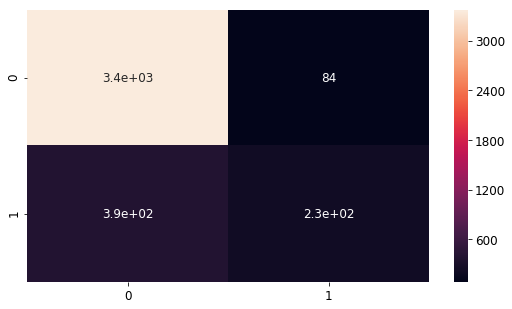

In [38]:
# confusion matrix
conf_matr = confusion_matrix(ylr_test, lr_pred)
plt.rcParams['figure.figsize'] = (9, 5)
sns.heatmap(conf_matr, annot = True)
plt.show()

In [39]:
# classification report
class_rep = classification_report(ylr_test, lr_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      3455
           1       0.73      0.37      0.49       614

    accuracy                           0.88      4069
   macro avg       0.81      0.67      0.71      4069
weighted avg       0.87      0.88      0.87      4069



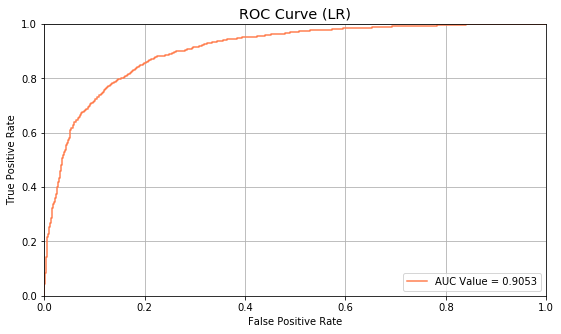

In [33]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

lr_probs = lr.predict_proba(xlr_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(ylr_test, lr_probs)
auc = metrics.roc_auc_score(ylr_test, lr_probs)

plt.plot(fpr, tpr, label = "AUC Value = " + str(auc.round(4)), color = 'coral')
plt.legend(loc = 4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve (LR)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [40]:
# RANDOM FOREST: Splitting the data

xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(x, y, test_size = 0.33, random_state = 9)

# checking the shapes
print("Shape of xrf_train :", xrf_train.shape)
print("Shape of yrf_train :", yrf_train.shape)
print("Shape of xrf_test :", xrf_test.shape)
print("Shape of yrf_test :", yrf_test.shape)

Shape of xrf_train : (8261, 28)
Shape of yrf_train : (8261,)
Shape of xrf_test : (4069, 28)
Shape of yrf_test : (4069,)


In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xrf_train, yrf_train)

yrf_pred = model.predict(xrf_test)

/Users/hy/opt/anaconda3/envs/food/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



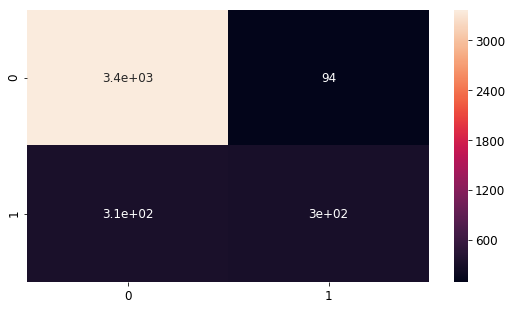

In [42]:
# confusion matrix
conf_matr = confusion_matrix(yrf_test, yrf_pred)
plt.rcParams['figure.figsize'] = (9, 5)
sns.heatmap(conf_matr, annot = True)
plt.show()

In [43]:
# classification report
class_rep = classification_report(yrf_test, yrf_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3455
           1       0.76      0.49      0.60       614

    accuracy                           0.90      4069
   macro avg       0.84      0.73      0.77      4069
weighted avg       0.89      0.90      0.89      4069



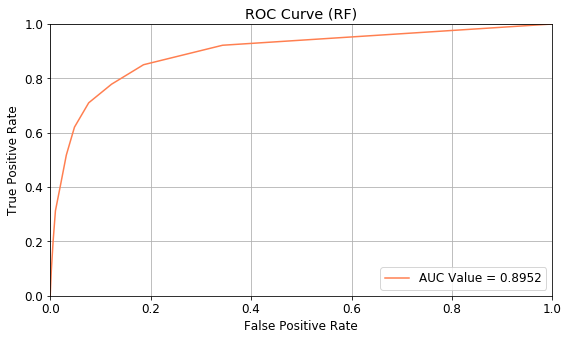

In [64]:
# Probabilities for each class
yrf_probs = model.predict_proba(xrf_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(yrf_test, yrf_probs)

fpr, tpr, _ = metrics.roc_curve(yrf_test, yrf_probs)
auc = metrics.roc_auc_score(yrf_test, yrf_probs)

plt.plot(fpr, tpr, label = "AUC Value = " + str(auc.round(4)), color = 'coral')
plt.legend(loc = 4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve (RF)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [ ]:
# oversampling for Random Forest
# Separate input features (X) and target variable (y)
y_o_rf = data_up.Revenue
x_o_rf = data_up.drop('Revenue', axis = 1)
 
# Train model
model_o = RandomForestClassifier()
model_o.fit(x_o_rf, y_o_rf)

yrf_pred = model.predict(xrf_test)
 
# Predict on training set
ylr62_pred = lr62.predict(x62)
 
# How's our accuracy?
print(accuracy_score(y62, ylr62_pred).round(4))


#### Feature Selections

In [66]:
# getting dependent and independent variables
x2 = data2

# removing the target column revenue from x
x2 = x2.drop(['Revenue'], axis = 1)
y2 = data2['Revenue']

# checking the shapes
print("Shape of x2:", x2.shape)
print("Shape of y2:", y2.shape)

Shape of x2: (12330, 17)
Shape of y2: (12330,)


In [67]:
xrf2_train, xrf2_test, yrf2_train, yrf2_test = train_test_split(x2, y2, test_size = 0.33, random_state = 9)

# checking the shapes
print("Shape of xrf2_train :", xrf2_train.shape)
print("Shape of yrf2_train :", yrf2_train.shape)
print("Shape of xrf2_test :", xrf2_test.shape)
print("Shape of yrf2_test :", yrf2_test.shape)

Shape of xrf2_train : (8261, 17)
Shape of yrf2_train : (8261,)
Shape of xrf2_test : (4069, 17)
Shape of yrf2_test : (4069,)


In [70]:
# FEATURE IMPORTANCES

from sklearn.feature_selection import SelectFromModel

sel_feat = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel_feat.fit(xrf2_train, yrf2_train)

sel_feat.get_support()

array([False, False, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False])

In [71]:
selected_feat = xrf2_train.columns[(sel_feat.get_support())]
print(selected_feat)

Index(['ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'PageValues'], dtype='object')


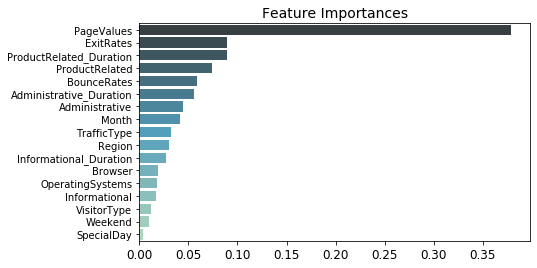

In [85]:
importances = sel_feat.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

feat_imp = []

for i in indices:
    feat_imp.append(data2.columns[i])

desc_imp = importances[::-1]
desc_imp = sorted(desc_imp, reverse = True)

sns.barplot(x = desc_imp, y = feat_imp, palette = 'GnBu_d')

plt.rcParams['figure.figsize'] = [7, 4]
plt.title('Feature Importances', fontsize = 14)
plt.yticks(size = 10)
plt.show()

In [86]:
# PERMUTATION IMPORTANCE

model2 = RandomForestClassifier()
model2.fit(xrf2_train, yrf2_train)

yrf2_pred = model2.predict(xrf2_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [87]:
# Finding the Permutation importance
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(model2, random_state = 9).fit(xrf2_test, yrf2_test)
eli5.show_weights(perm_imp, feature_names = xrf2_test.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.1110 ± 0.0104,PageValues
0.0134 ± 0.0044,ExitRates
0.0062 ± 0.0027,Month
0.0039 ± 0.0023,BounceRates
0.0025 ± 0.0026,ProductRelated
0.0012 ± 0.0023,VisitorType
0.0011 ± 0.0015,ProductRelated_Duration
0.0005 ± 0.0007,Browser
0.0001 ± 0.0015,Weekend
0.0000 ± 0.0040,Administrative_Duration


#### Reference
* [Kaggle: Online Shopper's Intention (Example Codes)](https://www.kaggle.com/roshansharma/online-shopper-s-intention)
* [Kaggle: LGBM - Online Shopper's EDA and Classification](https://www.kaggle.com/kageyama/lgbm-online-shopper-s-eda-and-classification)
* [Decision Trees Are Usually Better Than Logistic Regression](https://www.displayr.com/decision-trees-are-usually-better-than-logistic-regression/?utm_referrer=https%3A%2F%2Fwww.google.com%2F)
* [Logistic Regression versus Decision Trees](https://blog.bigml.com/2016/09/28/logistic-regression-versus-decision-trees/)
* [Logistic Regression vs. Decision Tree Classification](https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification/)
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76)
* [Using Random Forest to Learn Imbalanced Data](https://medium.com/mlrecipies/using-random-forest-to-learn-imbalanced-data-53ec3a874b5)
* [Important three techniques to improve machine learning model performance with imbalance datasets](https://towardsdatascience.com/working-with-highly-imbalanced-datasets-in-machine-learning-projects-c70c5f2a7b16)
* [How to Handle Imbalanced Classes in Machine Learning](https://elitedatascience.com/imbalanced-classes)
* [Dealing with Imbalanced Data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)
* [What metrics should be used for evaluating a model on an imbalanced data set? (precision + recall or ROC = TPR + FPR)](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba)
* [Feature Selection Using Random forest](https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f)
* [A Look into Feature Importance in Logistic Regression Models](https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f)
* [Explaining Feature Importance by example of a Random Forest](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)
* [How do I find which feature variable is most predictive in a binary classification problem?](https://www.quora.com/How-do-I-find-which-feature-variable-is-most-predictive-in-a-binary-classification-problem)